In [36]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [44]:
df_data = pd.read_csv('C:/Users/Enoza/Documents/Data/uni_ranking_dataset.csv')
df_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [45]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

### 1. Line charts

In [46]:
#Ciations and Teaching score vs world of top0 Universities
df_top100 = df_data.iloc[:100, :]
df_top100.shape

(100, 14)

In [47]:
fig = go.Figure()
trace_citation = go.Scatter(
    x = df_top100['world_rank'],
    y = df_top100['citations'],
    name = 'Citations Score',
    mode = 'lines+markers'
)
fig.add_trace(trace_citation)

trace_teach = go.Scatter(
    x = df_top100['world_rank'],
    y = df_top100['teaching'],
    name = 'Teaching Score'
)
fig.add_trace(trace_teach)

fig.update_layout(
    title = 'Citation and Teaching score vs World ranking of top 100 Universities',
    xaxis_title = 'World Ranking',
    yaxis_title = 'Score'
)

fig.show()

### 2. Scatter chart

In [48]:
#International score vs World ranking of top 100 in 2014, 2015, 2016 years
df_2014 = df_data[df_data['year']==2014].iloc[:100, :]
df_2015 = df_data[df_data['year']==2015].iloc[:100, :]
df_2016 = df_data[df_data['year']==2016].iloc[:100, :]

In [49]:
fig = go.Figure()

trace_2014 = go.Scatter(
    x = df_2014['world_rank'],
    y = df_2014['international'],
    mode = 'markers',
    name='2014'
)
fig.add_trace(trace_2014)

trace_2015 = go.Scatter(
    x = df_2015['world_rank'],
    y = df_2015['international'],
    mode = 'markers',
    name='2015'
)
fig.add_trace(trace_2015)

trace_2016 = go.Scatter(
    x = df_2016['world_rank'],
    y = df_2016['international'],
    mode = 'markers',
    name='2016'
)
fig.add_trace(trace_2016)

fig.update_layout(
    xaxis=dict(showgrid=False, title='World Ranking'),
    yaxis=dict(showgrid=False, title='Score'),
#     paper_bgcolor='rgba(0.0.0.0)',
    plot_bgcolor ='rgba(0,0,0,0)'
)

fig.show()

In [62]:
df_data["international"] = pd.to_numeric(df_data["international"], errors='coerce').fillna(0.0)
df_datas = df_data.sort_values(by =["international"])
df_datas

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
92,93,McMaster University,Canada,44.7,0.0,58.7,68.5,-,57.6,"23,823",19.3,15%,53 : 47,2011
49,49,University of Science and Technology of China,China,57.5,0.0,48.6,92.7,30.3,66.0,"14,290",7.9,2%,NaN,2011
172,173,Bielefeld University,Germany,39.9,0.0,35.7,70.4,-,49.3,"21,428",67.8,8%,57 : 43,2011
43,43,Karolinska Institute,Sweden,65.8,0.0,72.7,62.3,73.3,67.0,"7,774",11.5,22%,70 : 30,2011
16,17,University of Toronto,Canada,75.8,0.0,87.9,82.2,-,82.0,"66,198",19.5,15%,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,London School of Economics and Political Science,United Kingdom,62.4,99.5,56.2,51.6,38.4,58.3,NaN,NaN,NaN,NaN,2011
187,187,University of Innsbruck,Austria,37.9,99.5,34.8,60.2,35.0,47.2,"18,209",16.9,39%,54 : 46,2011
1995,=193,University of Luxembourg,Luxembourg,25.0,99.8,26.7,84.8,38.1,49.4,"5,144",15.9,52%,50 : 50,2016
2540,601-800,Qatar University,Qatar,9.9,99.9,10.3,22.3,55.2,-,"9,583",19.0,42%,74 : 26,2016


In [63]:
#Sort International score then redraw scatter charts

df_2014s = df_datas[df_datas['year']==2014].iloc[:100, :]
df_2015s = df_datas[df_datas['year']==2015].iloc[:100, :]
df_2016s = df_datas[df_datas['year']==2016].iloc[:100, :]

fig = go.Figure()

trace_2014 = go.Scatter(
    x = df_2014s['world_rank'],
    y = df_2014s['international'],
    mode = 'markers',
    name='2014'
)
fig.add_trace(trace_2014)

trace_2015 = go.Scatter(
    x = df_2015s['world_rank'],
    y = df_2015s['international'],
    mode = 'markers',
    name='2015'
)
fig.add_trace(trace_2015)

trace_2016 = go.Scatter(
    x = df_2016s['world_rank'],
    y = df_2016s['international'],
    mode = 'markers',
    name='2016'
)
fig.add_trace(trace_2016)

fig.update_layout(
    xaxis=dict(showgrid=False, title='World Ranking'),
    yaxis=dict(showgrid=False, title='Score'),
#     paper_bgcolor='rgba(0.0.0.0)',
    plot_bgcolor ='rgba(0,0,0,0)'
)

fig.show()

In [98]:
#3D Scatter
fig = go.Figure(
    go.Scatter3d(
        x = df_data['world_rank'],
        y = df_data['research'],
        z = df_data['citations'],
        mode = 'markers',
        marker = dict(
            size = 5,
            color = 'red'
        )
    )
)

fig.update_layout(
    width = 950,
    height = 650,
    margin = dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig.show()

### 3. Bar chart

In [27]:
#Display Research score and Teaching score on bar charts of 5 universities in 2016
df_52016 = df_data[df_data['year']==2016].iloc[:5, :]

In [44]:
trace_research = go.Bar(
    x = df_52016['university_name'],
    y = df_52016['research'],
    name = 'Research Score',
    text = df_52016['research'],
  marker = dict(color='#808000', line=dict(color='#00FF00', width=1.5))
)


trace_teaching = go.Bar(
    x = df_52016['university_name'],
    y = df_52016['teaching'],
    name = 'Teaching Score',
    text = df_52016['teaching']
)
fig = go.Figure([trace_research, trace_teaching])

fig.update_layout(
    width = 1000,
    height = 600,
    plot_bgcolor ='rgba(0,0,0,0)'
)


fig.show()

### 4. Pie chart

In [63]:
# Compare number of student of last 7 universities
df_last7 = df_data.iloc[-8:-1, :]
df_last7.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2595,601-800,West University of Timişoara,Romania,16.1,21.0,3.9,22.4,-,-,"12,933",19.0,3%,62 : 38,2016
2596,601-800,University of Westminster,United Kingdom,17.3,81.9,11.7,21.1,28.5,-,"16,609",21.0,43%,57 : 43,2016
2597,601-800,Xidian University,China,17.9,12.8,12.1,8.9,83.7,-,"31,618",16.4,2%,29 : 71,2016
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016


In [64]:
num_students = [float(item.replace(',', '.')) for item in df_last7['num_students']]
num_students

[12.933, 16.609, 31.618, 21.958, 31.268, 4.122, 10.117]

In [65]:
fig = go.Figure(
    data = go.Pie(
        values = num_students,
        labels = df_last7['university_name'],
        hole = 0.3,
        pull = [0, 0.2, 0, 0, 0 ,0]
    )
)

fig.show()

In [69]:
#Compare income and internartional stduent of top 4 universities
df_top4 = df_data.iloc[:5, :]
df_top4.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [91]:
from plotly.subplots import make_subplots

fig= make_subplots(rows=1, cols= 2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(
    go.Pie(
        labels = df_top4['university_name'],
        values = df_top4['income'],
        hole = 0.3,
        name = 'Income'
    ), 1, 1
)
fig.add_trace(
        go.Pie(
            labels = df_top4['university_name'],
            values = [float(item.replace('%', '')) for item in df_top4['international_students']],
            hole = 0.3,
            name = 'International Student'
    ), 1, 2
)
  
fig.update_layout(
    title= 'Compare income and international of top 4',
    annotations= [
        dict(text='Income', x=0.18, y=0.5, font_size= 15, showarrow= False),
        dict(text='IS', x=0.8, y=0.5, font_size= 15, showarrow= False)
    ]
)
    
fig.show()

### 4. Wordcloud

In [87]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [78]:
!pip install wordcloud

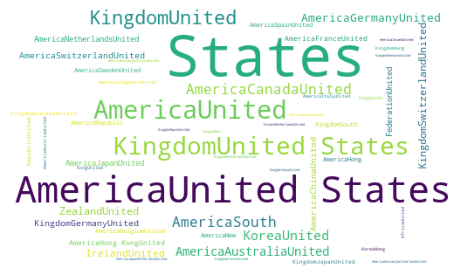

In [88]:
plt.subplots(figsize=(8, 8))

country_names = ''.join(df_data['country'])

wordcloud = WordCloud(
    width=512,
    height=300,
    background_color='white'
).generate(country_names)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 6. Violin chart

In [99]:
#Display teaching score, research score, international score in violin chart
fig = go.Figure()

score_arr = ['teaching', 'research', 'international']
for score in score_arr:
    fig.add_trace(
        go.Violin(
            y = df_data[score],
            name = score.capitalize()+score,
            box_visible = True,
            points = 'all'
        )
    )
    
fig.show()